In [2]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as c
import sympy as sy
import scipy.constants as pc
from sympy import *
from math import log10, floor

In [3]:
# Funktionen
def am(werte):
    return np.mean(werte)

def std(werte):
    summen_der_quadrate = 0
    for wert in werte:
        summen_der_quadrate+=(wert-am(werte))**2       
    return np.sqrt(summen_der_quadrate/(werte.size-1))

def stu(werte):
    return std(werte)/np.sqrt(werte.size)

def fehler(f, werte, unsicherheiten, variablen):
    zMax = 0
    for i in range(werte.size):
        dif = np.abs(sy.diff(f, variablen[i]))
        zMax += (dif * unsicherheiten[i])**2
    zMax = sqrt(zMax)
    for j in range(werte.size):
        zMax = sub(zMax, variablen[j], werte[j])
    return zMax

def fehlerMax(f, werte, unsicherheiten, variablen):
    zMax = 0
    for i in range(werte.size):
        dif = np.abs(sy.diff(f, variablen[i]))
        zMax += dif * unsicherheiten[i]
    for j in range(werte.size):
        zMax = sub(zMax, variablen[j], werte[j])
    return zMax

def groessterBeitrag(f, werte, unsicherheiten, variablen):
    zMax = 0
    zMaxArray = np.array([])
    for i in range (werte.size):
        zMax = (np.abs(sy.diff(f, variablen[i])) * unsicherheiten[i])
        for j in range(werte.size):
            zMax = sub(zMax, variablen[j], werte[j])
        x = np.array([zMax])
        zMaxArray = np.append(zMaxArray, x)
    return variablen[np.argmax(zMaxArray)]

def sub(zMax, variable, wert):
    return zMax.subs([(variable, wert)])

def einfachGaussAdd(unsicherheiten, koeffizienten):
    dz = 0
    for i in range (unsicherheiten.size):
        dz += (unsicherheiten[i]*unsicherheiten[i])**2
    return sqrt(dz)

def einfachGaussMult(unsicherheiten, werte, exponenten):
    dz = 0
    for i in range (unsicherheiten.size):
        dz += (exponenten[i]*unsicherheiten[i]/werte[i])**2
    return sqrt(dz)

def einfachGaussMultMax(unsicherheiten, werte, exponenten):
    max_a = 0
    num = -1
    for i in range (unsicherheiten.size):
        maxi = (exponenten[i]*unsicherheiten[i]/werte[i])**2
        if max_a <= maxi:
            max_a = maxi
            num = i
    return (max_a, num)

def vertraeglichkeit(am_1, am_2, stu_1, stu_2):
    return (np.abs(am_1-am_2)/(sqrt((stu_1**2)*(stu_2**2))))

def bestA(x, y):
    return (sum(x**2)*sum(y)-sum(x)*sum(x*y))/(x.size*sum(x**2)-sum(x)**2)

def bestB(x, y):
    return (x.size*sum(x*y)-sum(x)*sum(y))/(x.size*sum(x**2)-sum(x)**2)

def streuung(x, y):
    s = 0
    for i in range(x.size):
        s += (y[i]-(bestA(x, y)+bestB(x, y)*x[i]))**2
    return np.sqrt(s/(x.size-2))

def stuA(x, y):
    s = streuung(x, y)
    return s*np.sqrt(sum(x**2)/((x.size*sum(x**2)-sum(x)**2)))

def stuB(x, y):
    s = streuung(x, y)
    return s*np.sqrt(x.size/((x.size*sum(x**2)-sum(x)**2)))



In [4]:
# s(m)
m = np.array([50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 
              550, 600, 650, 700, 750, 800, 850, 900]) #0.1g
mess = np.array([0.44, 0.81, 1.22, 1.61, 2.02, 2.43, 2.79, 3.13, 3.60, 3.97, 
                 4.39, 4.74, 5.15, 5.52, 5.87, 6.36, 6.76, 7.11]) # 0.1
alu = np.array([0.19, 0.40, 0.57, 0.80, 0.96, 1.18, 1.39, 1.59, 1.77, 2.0, 
                2.16, 2.45, 2.58, 2.77, 2.97, 3.15, 3.38, 3.56]) # 0.1
stahl = np.array([0.07, 0.13, 0.19, 0.27, 0.32, 0.39, 0.44, 0.50, 0.57, 0.63, 
                  0.69, 0.75, 0.81, 0.89, 0.95, 1.02, 1.08, 1.14]) #0.1

# Verschiedene d
m_short = 450 # 0.1g
d = np.array([75.1, 71.3, 67.1, 63.2, 59.3, 54.7, 50.3, 46.7, 43.3, 37.1, 33.3]) # 0.1
s = np.array([0.89, 0.76, 0.65, 0.54, 0.45, 0.34, 0.29, 0.22, 0.20, 0.12, 0.07]) #0.1

# Fläche-Biege
a_r = np.array([10.25, 10.15, 10.15, 10.10, 12.20, 10.15, 10.10, 12.10, 10.95, 10.15])
i_r = np.array([8.05, 7.0, 5.85, 4.0, 10.0, 0, 0, 0, 6.9, 6.8])
s_f = np.array([1.24, 0.94, 0.78, 0.77, 0.65, 0.69, 0.79, 0.34, 0.97, 0.76])
flaeche = pc.pi*(a_r**2-i_r**2)
biege = pc.pi*(a_r**4-i_r**4)

In [5]:
#Fehler 

material = np.array(["Messing", "Aluminium", "Stahl"])

m_über_s = np.array([127.22,251.3,794])
m_über_s_f = np.array([0.42, 1.3, 4])

g = 9.808
g_f = 0.001

d = 84.8
d_f = 2

a = 6
a_f = 0.1

b = 10
b_f = 0.1

#Elastizitätsmopdule

elamodule = np.zeros(3)
for i in range(3):
    elamodule[i] = 0.25 * (m_über_s[i] * g * d**3) / (a * b**3)
    print("Für", material[i], "ist das Elaszitätsmodul", elamodule[i],";")

#Fehlerberechnung:
# m_über_s, g, d, a, b, 
for i in range(3):
    expo_ela = np.array([1,1,3,-1,-3])
    werte_ela = np.array([m_über_s[i], g, d, a, b])
    unsich_ela = np.array([m_über_s_f[i], g_f, d_f, a_f, b_f])
    print("Für",material[i],"ist der Fehler", elamodule[i] * einfachGaussMult(unsich_ela, werte_ela, expo_ela),";")
    

   


Für Messing ist das Elaszitätsmodul 31703.86160085674 ;
Für Aluminium ist das Elaszitätsmodul 62625.219464669855 ;
Für Stahl ist das Elaszitätsmodul 197868.77936708264 ;
Für Messing ist der Fehler 2495.34107648517 ;
Für Aluminium ist der Fehler 4935.39938501654 ;
Für Stahl ist der Fehler 15592.0063411817 ;


In [6]:
for i in range(3):
    max_a, num = einfachGaussMultMax(unsich_ela, werte_ela, expo_ela)
    print("Für",material[i], max_a*elamodule[i] , num)

Für Messing 158.71682227199994 2
Für Aluminium 313.5162508799999 2
Für Stahl 990.5766143999997 2


Steigung Messing, Abschnitt Messing 0.00785882352941177 0.04039215686274236
Steigung Alu, Abschnitt Alu 0.003977915376676987 -0.00784313725490196
Steigung Stahl, Abschnitt Stahl 0.001258204334365325 0.004575163398692811
US Steigung Messing, Abschnitt Messing 2.6156257777424425e-05 0.014156231315015045
US Steigung Alu, Abschnitt Alu 2.0643962435583102e-05 0.011172879162738255
US Steigung Stahl, Abschnitt Stahl 6.455793704957955e-06 0.00349399022547796


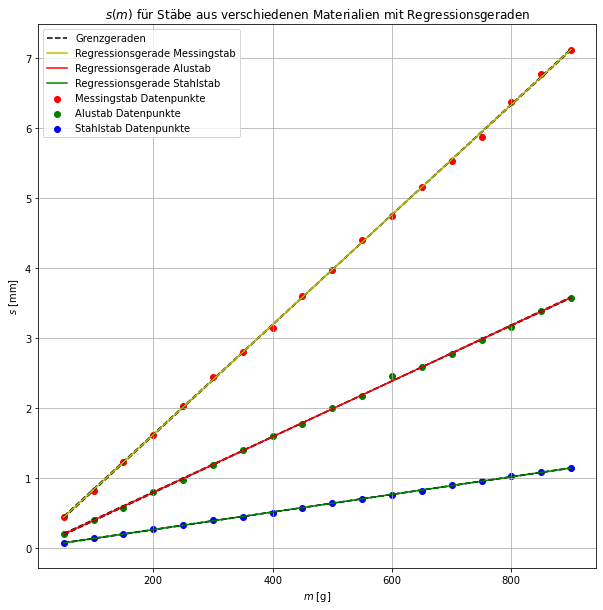

In [7]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(m, mess, color='r', label='Messingstab Datenpunkte')
ax.scatter(m, alu, color='g', label='Alustab Datenpunkte')
ax.scatter(m, stahl, color='b', label='Stahlstab Datenpunkte')

x = np.linspace(50, 900, 18)
b_mess, a_mess = bestB(m, mess), bestA(m, mess)
b_alu, a_alu = bestB(m, alu), bestA(m, alu)
b_stahl, a_stahl = bestB(m, stahl), bestA(m, stahl)

print('Steigung Messing, Abschnitt Messing', b_mess, a_mess)
print('Steigung Alu, Abschnitt Alu', b_alu, a_alu)
print('Steigung Stahl, Abschnitt Stahl', b_stahl, a_stahl)

us_b_mess, us_a_mess = stuB(m, mess), stuA(m, mess)
us_b_alu, us_a_alu = stuB(m, alu), stuA(m, alu)
us_b_stahl, us_a_stahl = stuB(m, stahl), stuA(m, stahl)

ax.plot(x, x*(b_mess+us_b_mess)+ a_mess-us_a_mess, color='black', ls='--', label='Grenzgeraden')
ax.plot(x, x*(b_mess-us_b_mess)+ a_mess+us_a_mess, color='black', ls='--')

ax.plot(x, x*(b_alu+us_b_alu)+ a_alu-us_a_alu, color='black', ls='--')
ax.plot(x, x*(b_alu-us_b_alu)+ a_alu+us_a_alu, color='black', ls='--')

ax.plot(x, x*(b_stahl+us_b_stahl)+ a_stahl-us_a_stahl, color='black', ls='--')
ax.plot(x, x*(b_stahl-us_b_stahl)+ a_stahl+us_a_stahl, color='black', ls='--')

print('US Steigung Messing, Abschnitt Messing', us_b_mess, us_a_mess)
print('US Steigung Alu, Abschnitt Alu', us_b_alu, us_a_alu)
print('US Steigung Stahl, Abschnitt Stahl', us_b_stahl, us_a_stahl)

ax.plot(x, x*b_mess+ a_mess, color='y', label='Regressionsgerade Messingstab')
ax.plot(x, x*b_alu+ a_alu, color='r', label='Regressionsgerade Alustab')
ax.plot(x, x*b_stahl+ a_stahl, color='g', label='Regressionsgerade Stahlstab')

ax.set(xlabel=r'$m$ [g]', ylabel=r'$s$ [mm]', title=r'$s(m)$ für Stäbe aus verschiedenen Materialien mit Regressionsgeraden')
ax.legend()
ax.grid()

fig.savefig("s(m).png")

# E-Modul
#A =
#E = m*g*l/(A*s)

#werte_E = np.array([]) 
#us_Ev = np.array([])
#exp_E = np.array([1, 1, 1, -1, -1])

#us_E = einfachGaussMult(us_Ev, werte, exponenten)

[ 50. 100. 150. 200. 250. 300. 350. 400. 450. 500. 550. 600. 650. 700.
 750. 800. 850. 900.]
[ 0.00666667 -0.01627451  0.00078431 -0.00215686  0.01490196  0.03196078
 -0.00098039 -0.05392157  0.02313725  0.00019608  0.0272549  -0.01568627
  0.00137255 -0.02156863 -0.0645098   0.03254902  0.03960784 -0.00333333]
[-0.00105263  0.0100516  -0.01884417  0.01226006 -0.02663571 -0.00553148
  0.00557276  0.00667699 -0.01221878  0.01888545 -0.02001032  0.07109391
  0.00219814 -0.00669763 -0.0055934  -0.02448916  0.00661507 -0.0122807 ]
[ 0.00251462 -0.0003956  -0.00330581  0.01378397  0.00087375  0.00796354
 -0.00494668 -0.0078569  -0.00076711 -0.00367733 -0.00658755 -0.00949776
 -0.01240798  0.0046818   0.00177159  0.00886137  0.00595115  0.00304094]


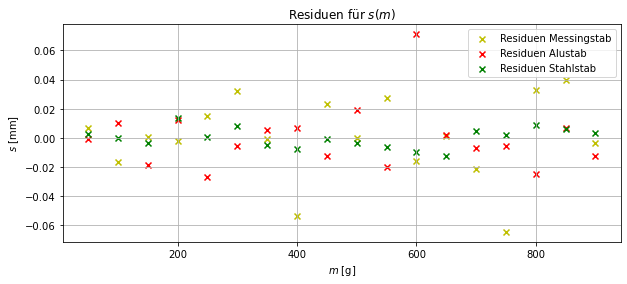

In [8]:
fig, ax = plt.subplots(figsize=(10,4))

res_mess = (mess- (x*b_mess + a_mess))
res_alu = (alu- (x*b_alu + a_alu))
res_stahl = (stahl- (x*b_stahl + a_stahl))

ax.scatter(x, res_mess, color='y', marker='x', label='Residuen Messingstab')
ax.scatter(x, res_alu, color='r', marker='x',label='Residuen Alustab')
ax.scatter(x, res_stahl, color='g', marker='x',label='Residuen Stahlstab')

print(x)
print(res_mess)
print(res_alu)
print(res_stahl)

ax.set(xlabel=r'$m$ [g]', ylabel=r'$s$ [mm]', title=r'Residuen für $s(m)$')
ax.legend()
ax.grid()

fig.savefig("s(m)_residuen.png")

In [14]:
#Array runden:

def round_to_1(x):
    return round(x, 1-int(floor(log10(abs(x)))))

round_array = np.array([0.276   ,0.2166  ,0.1534 ,-0.036  ,-0.036  ,-0.12   ,-0.1624 ,-0.3051])

for i in range(len(round_array)):
        round_array[i] = round_to_1(round_array[i])

print(round_array)

[ 0.28   0.22   0.15  -0.036 -0.036 -0.12  -0.16  -0.31 ]


In [20]:
print((0.005006229975080099**0.5)*elamodule[2])

14000.149483519997


In [21]:
print((0.0065**0.5)*elamodule[2])

15952.690995986382
